In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [7]:
# import dataset

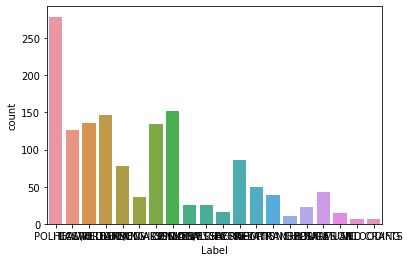

In [8]:
articles_train = pd.read_csv('data/Train.csv')
articles_test = pd.read_csv('data/Test.csv')
articles_test.head()
ax = sns.countplot(x="Label", data=articles_train)


In [9]:
#preprocessing
#rename columns
articles_train = articles_train.rename(columns={'Label':'Categories','Text':'Headlines'})


In [10]:

def clean_lower(text):
    return str(text).lower()
articles_train['Headlines'] = articles_train['Headlines'].apply(clean_lower)
articles_train['Headlines'].head()

0     mwangonde: khansala wachinyamata akamati achi...
1     mcp siidakhutire ndi kalembera chipani cha ma...
2    bungwe la manepo lapempha boma liganizire anth...
3     ndale zogawanitsa miyambo zanyanya si zachile...
4     nanga wapolisi ataphofomoka? masiku ano sichi...
Name: Headlines, dtype: object

In [11]:
#articles_train = articles_train.rename(columns={'Text':'Headlines'})
news_example = articles_train.iloc[0]
print(f"""
Headline
{news_example['Headlines']}


Category
{news_example['Categories']}

""")


Headline
 mwangonde: khansala wachinyamata akamati achinyamata ndi atsogoleri a mawa, ambiri amaganiza kuti izi ndi nkhambakamwa chabe. koma achinyamata ena, monga lusubilo mwangonde, akukwaniritsa akupherezetsa mawuwa osati pongolota kuti adzakhala, koma kutsogolera kumene chifukwa nthawi yawo yakwana. dailes banda adacheza ndi mwangonde, khansala wachinyama, yemwe akuimira jumbo ward mumzinda wa mzuzu, motere:  chisale watuluka nkumangidwanso  sipakala waimitsa nyumba ya malamulo  pa wenela pasintha zedi ali ndi masomphenya: mwangonde tikudziweni  ndine lusubilo mwangonde, ndili ndi zaka 27 zakubadwa. ndinabadwa mbanja la ana asanu ndipo ndine wachinayi kubadwa. ndimachokera mmudzi mwa mwamalopa, kwa paramount chief kyungu mboma la karonga. sindili pabanja pakadalipano.
 mbiri ya maphunziro anu ndi yotani? maphunziro anga a pulaimale ndidachitira kusukula yapulaiveti ya viphya mumzinda wa mzuzu ndipo asekondale ndidachitira pa phwezi boys mboma la rumphi. ndili ndi diploma ya accoun

In [24]:
#tokenize :split text to smaller pieces using NLTK
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
import regex

tokenizer = RegexpTokenizer("[\w']+") 

def clean_tokenization(headline):
    return tokenizer.tokenize(str(headline))

articles_train['Headlines'] = articles_train['Headlines'].apply(clean_tokenization)
words = articles_train['Headlines']

count = dict()
for word in words:
    for w in word:
        if w in count:
            count[w] += 1

        else:
            count[w] =1
            
print(count)
        # print(w)


# def word_count():
#     counts = dict()

#     for word in words:
#         # if word in counts:
#         #     counts[word] += 1
#         # else:
#         #     counts[word] = 1

#         return word

# print( word_count())    



{"'mwangonde'": 5, "'khansala'": 50, "'wachinyamata'": 4, "'akamati'": 9, "'achinyamata'": 230, "'ndi'": 14244, "'atsogoleri'": 245, "'a'": 5124, "'mawa'": 124, "'ambiri'": 696, "'amaganiza'": 27, "'kuti'": 9800, "'izi'": 1316, "'nkhambakamwa'": 5, "'chabe'": 92, "'koma'": 2868, "'ena'": 1884, "'monga'": 772, "'lusubilo'": 2, "'akukwaniritsa'": 2, "'akupherezetsa'": 1, "'mawuwa'": 11, "'osati'": 247, "'pongolota'": 1, "'adzakhala'": 23, "'kutsogolera'": 15, "'kumene'": 150, "'chifukwa'": 2210, "'nthawi'": 963, "'yawo'": 243, "'yakwana'": 21, "'dailes'": 7, "'banda'": 467, "'adacheza'": 80, "'wachinyama'": 1, "'yemwe'": 1005, "'akuimira'": 6, "'jumbo'": 5, "'ward'": 11, "'mumzinda'": 234, "'wa'": 6896, "'mzuzu'": 175, "'motere'": 78, "'chisale'": 377, "'watuluka'": 370, "'nkumangidwanso'": 365, "'sipakala'": 346, "'waimitsa'": 345, "'nyumba'": 834, "'ya'": 4901, "'malamulo'": 1064, "'pa'": 4870, "'wenela'": 489, "'pasintha'": 357, "'zedi'": 406, "'ali'": 1088, "'masomphenya'": 28, "'tik

In [4]:
#word frequency
from collections import Counter

In [5]:
# Data Exploration
#articles_train.info()
#no of missong values
articles_train.isna().sum()

NameError: name 'articles_train' is not defined


Headline
 mwangonde: khansala wachinyamata akamati achinyamata ndi atsogoleri a mawa, ambiri amaganiza kuti izi ndi nkhambakamwa chabe. koma achinyamata ena, monga lusubilo mwangonde, akukwaniritsa akupherezetsa mawuwa osati pongolota kuti adzakhala, koma kutsogolera kumene chifukwa nthawi yawo yakwana. dailes banda adacheza ndi mwangonde, khansala wachinyama, yemwe akuimira jumbo ward mumzinda wa mzuzu, motere:  chisale watuluka nkumangidwanso  sipakala waimitsa nyumba ya malamulo  pa wenela pasintha zedi ali ndi masomphenya: mwangonde tikudziweni  ndine lusubilo mwangonde, ndili ndi zaka 27 zakubadwa. ndinabadwa mbanja la ana asanu ndipo ndine wachinayi kubadwa. ndimachokera mmudzi mwa mwamalopa, kwa paramount chief kyungu mboma la karonga. sindili pabanja pakadalipano.
 mbiri ya maphunziro anu ndi yotani? maphunziro anga a pulaimale ndidachitira kusukula yapulaiveti ya viphya mumzinda wa mzuzu ndipo asekondale ndidachitira pa phwezi boys mboma la rumphi. ndili ndi diploma ya accoun

In [14]:
articles_train = articles_train[['Categories', 'Headlines']]
data_type = articles_train.groupby('Categories').count()['Headlines'].reset_index()
data_type


,Categories,Headlines
0,ARTS AND CRAFTS,7
1,CULTURE,23
2,ECONOMY,86
3,EDUCATION,43
4,FARMING,78
5,FLOODING,7
6,HEALTH,127
7,LAW/ORDER,136
8,LOCALCHIEFS,25
9,MUSIC,15


In [15]:
# map category to target 
mapper = {}

for i , category in enumerate(articles_train["Categories"].unique()):
    mapper[category] = i

articles_train["category_target"] = articles_train['Categories'].map(mapper)
articles_train.head()

,Categories,Headlines,category_target
0,POLITICS,"[mwangonde, khansala, wachinyamata, akamati, a...",0
1,POLITICS,"[mcp, siidakhutire, ndi, kalembera, chipani, c...",0
2,HEALTH,"[bungwe, la, manepo, lapempha, boma, liganizir...",1
3,POLITICS,"[ndale, zogawanitsa, miyambo, zanyanya, si, za...",0
4,LAW/ORDER,"[nanga, wapolisi, ataphofomoka, masiku, ano, s...",2


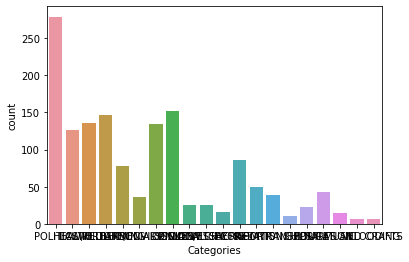

In [16]:
#plot of articles count per category
# articles_train.Categories.value_counts().plot.bar(figsize = (20,10), title = "headlines based on category")
ax = sns.countplot(x="Categories", data=articles_train)

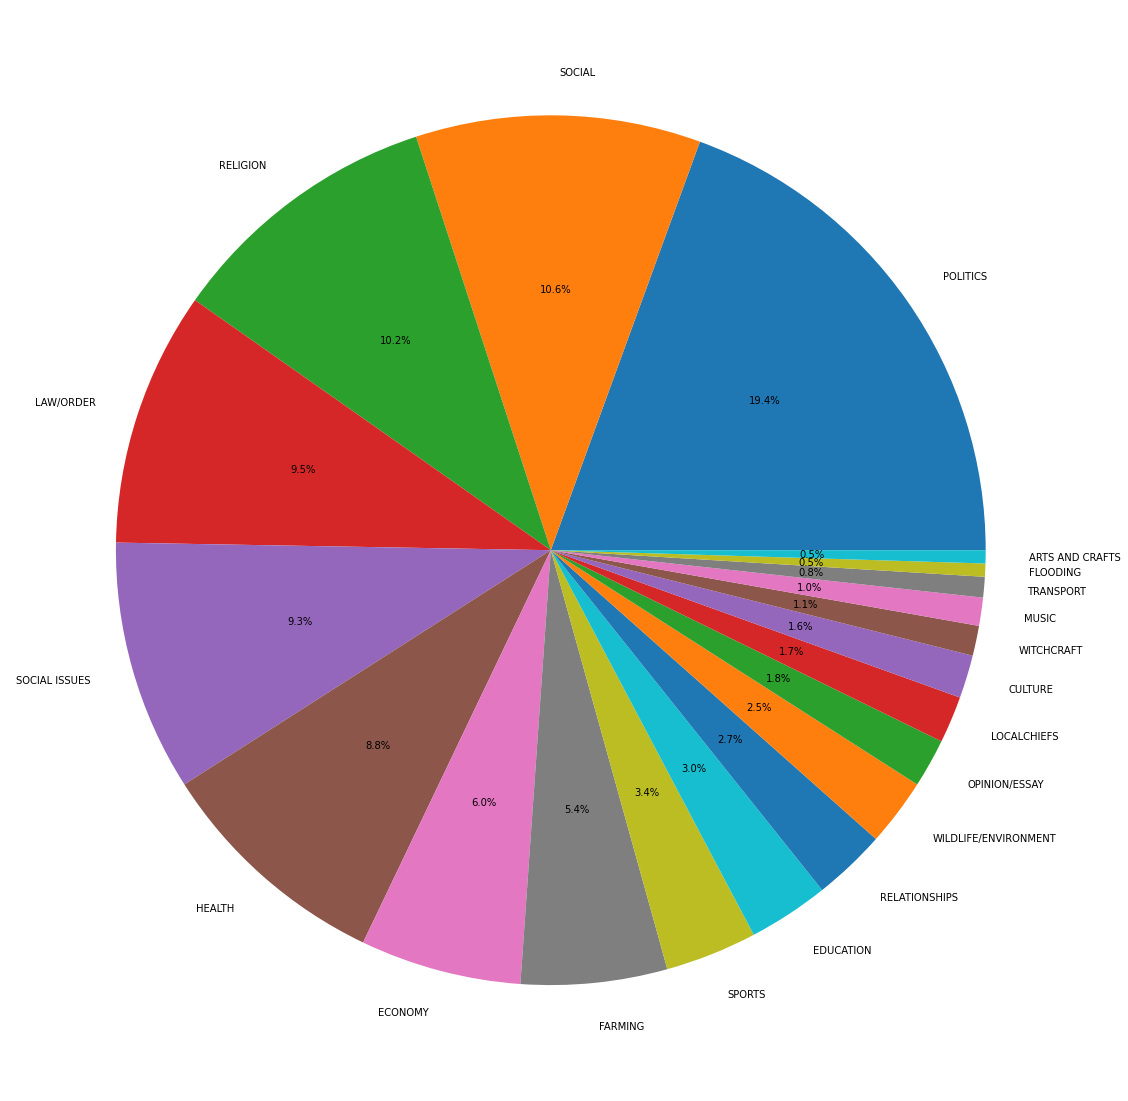

In [17]:
#pie chat
fig = plt.figure(figsize=(20,20))
plt.pie(articles_train['Categories'].value_counts().values, 
        labels=articles_train['Categories'].value_counts().index,
        autopct='%1.1f%%');


In [20]:
#word occurace count



NameError: name 'Headlines' is not defined